In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [ ]:
## Dejar esto asi, para cuando haya que hacer un script que levante todo. Caro.
# pacientes = {'S': [], 'P': []}
# for c in (['S','P']):
#     for
# pacientes['P'].append(loadmat('P01.mat')['data'])
# print (pacientes['P'][0][0][0]) 

In [74]:
paciente = loadmat('data/P01.mat')['data']
## Creemos que las dimensiones son: impulso, electrodo, tiempo
print(len(paciente))
print(len(paciente[0]))
print(len(paciente[0][0]))

894
256
201


(256, 201)


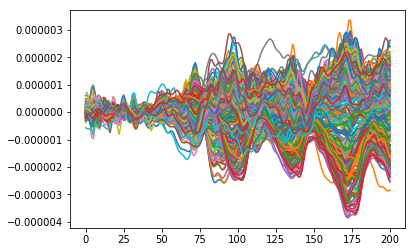

In [75]:
## Crea un nuevo paciente promediando todos los epoch
paciente_promediado = np.zeros_like(paciente[0])

for epoch in paciente:
    paciente_promediado += epoch
paciente_promediado/=len(paciente)
#print (paciente_promediado)
print(paciente_promediado.shape)
plt.clf()
plt.plot(paciente_promediado.transpose())
plt.show()


/usr/lib/python3/dist-packages/scipy/signal/spectral.py:278: UserWarning: nperseg = 256, is greater than x.shape[-1] = 201, using nperseg = x.shape[-1]
  % (nperseg, axis, x.shape[axis], axis))


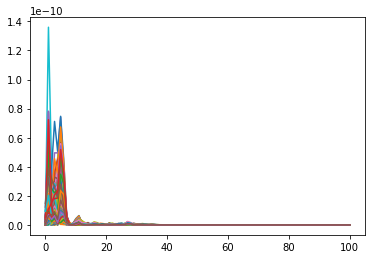

In [76]:
## Aca se hace welch

paciente_welch = np.zeros((256,101))
for i in range(len(paciente_promediado)):
    paciente_welch[i] = (welch(paciente_promediado[i]))[1]
plt.clf()
plt.plot(paciente_welch.transpose())
plt.show()

In [110]:
ws = [[] for i in range(256)]
for epoch in paciente:
    for electrodo in epoch:
        w = welch(electrodo)
        ws[list(epoch).index(electrodo)].append(w[1])
promedios = [[] for i in range(256)]
for electrodo in ws:
    np.transpose(electrodo)
    promedios

/home/marto/.local/lib/python3.5/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()